In [53]:
import arff
import pandas as pd
from scipy.io import arff
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [95]:
import arff
import pandas as pd

# Load ARFF file with liac-arff
with open("dataset.arff", "r") as f:
    dataset = arff.load(f)

# Convert to DataFrame
df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])
print(df.head())



   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,420768.0,17532.500000,10122.116943,1.0000,8766.75,17532.5,26298.25,35064.0
year,420768.0,2014.662560,1.177198,2013.0000,2014.00,2015.0,2016.00,2017.0
month,420768.0,6.522930,3.448707,1.0000,4.00,7.0,10.00,12.0
day,420768.0,15.729637,8.800102,1.0000,8.00,16.0,23.00,31.0
hour,420768.0,11.500000,6.922195,0.0000,5.75,11.5,17.25,23.0
PM2.5,412029.0,79.793428,80.822391,2.0000,20.00,55.0,111.00,999.0
PM10,414319.0,104.602618,91.772426,2.0000,36.00,82.0,145.00,999.0
SO2,411747.0,15.830835,21.650603,0.2856,3.00,7.0,20.00,500.0
NO2,408652.0,50.638586,35.127912,1.0265,23.00,43.0,71.00,290.0
CO,400067.0,1230.766454,1160.182716,100.0000,500.00,900.0,1500.00,10000.0


In [96]:
df['date']=pd.to_datetime(df[['year', 'month', 'day', 'hour']], dayfirst=True)

In [97]:
df = df.drop(columns=['year', 'month', 'day', 'hour', 'No'])


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   PM2.5    412029 non-null  float64       
 1   PM10     414319 non-null  float64       
 2   SO2      411747 non-null  float64       
 3   NO2      408652 non-null  float64       
 4   CO       400067 non-null  float64       
 5   O3       407491 non-null  float64       
 6   TEMP     420370 non-null  float64       
 7   PRES     420375 non-null  float64       
 8   DEWP     420365 non-null  float64       
 9   RAIN     420378 non-null  float64       
 10  wd       418946 non-null  object        
 11  WSPM     420450 non-null  float64       
 12  station  420768 non-null  object        
 13  date     420768 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 44.9+ MB


In [98]:
df.set_index('date', inplace=True)

In [62]:
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [63]:
df.isnull().sum()

PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [64]:
col = ["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]
df[col] = df[col].interpolate(method="time")


In [65]:

df["wd"] = df["wd"].fillna(method="ffill")


C:\Users\nkulo\AppData\Local\Temp\ipykernel_25944\1863673188.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["wd"] = df["wd"].fillna(method="ffill")


In [66]:
df.isnull().sum()

PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Feature Engineering

In [67]:
#lag features
pollutants = ["PM2.5","PM10","SO2","NO2","CO","O3"]
for pollutant in pollutants:
    df[f"{pollutant}_lag12"] = df[pollutant].shift(12)
    df[f"{pollutant}_lag24"] = df[pollutant].shift(24)


In [68]:
#rolling window stats
window_sizes = [12,24, 48, 72]
for pollutant in pollutants:
    for window in window_sizes:
        df[f"{pollutant}_rollmean_{window}"] = df[pollutant].rolling(window=window).mean()
        df[f"{pollutant}_rollstd_{window}"] = df[pollutant].rolling(window=window).std()

In [69]:
#time based features
df['month'] = df.index.month
df['day'] = df.index.day


In [70]:
#seasonal encoding
df['season'] = df['month'] % 12 // 3 + 1

In [71]:
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,...,O3_rollstd_12,O3_rollmean_24,O3_rollstd_24,O3_rollmean_48,O3_rollstd_48,O3_rollmean_72,O3_rollstd_72,month,day,season
date,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2


In [72]:
#drop rows with NaN values created by lag and rolling features
df = df.dropna()

In [73]:
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,...,O3_rollstd_12,O3_rollmean_24,O3_rollstd_24,O3_rollmean_48,O3_rollstd_48,O3_rollmean_72,O3_rollstd_72,month,day,season
date,,,,,,,,,,,,,,,,,,,,,
2013-03-03 23:00:00,46.0,94.0,29.0,84.0,1200.0,2.0,5.2,1014.8,-10.6,0.0,...,31.975725,19.125000,27.300760,24.437500,22.836054,37.583333,27.583293,3,3,2
2013-03-04 00:00:00,42.0,83.0,51.0,86.0,1300.0,4.0,7.7,1015.7,-11.1,0.0,...,32.683399,19.208333,27.249219,23.604167,22.836831,36.569444,27.455381,3,4,2
2013-03-04 01:00:00,49.0,80.0,39.0,64.0,1000.0,25.0,8.2,1016.7,-11.7,0.0,...,32.781531,20.166667,27.021194,23.083333,22.504688,35.847222,27.057924,3,4,2
2013-03-04 02:00:00,34.0,62.0,9.0,14.0,300.0,68.0,8.1,1016.7,-11.8,0.0,...,33.971914,22.916667,28.414504,23.520833,23.173710,35.777778,26.967493,3,4,2
2013-03-04 03:00:00,12.0,34.0,6.0,12.0,400.0,77.0,7.2,1016.9,-11.6,0.0,...,33.971914,26.041667,30.088968,24.041667,24.090219,35.847222,27.068333,3,4,2


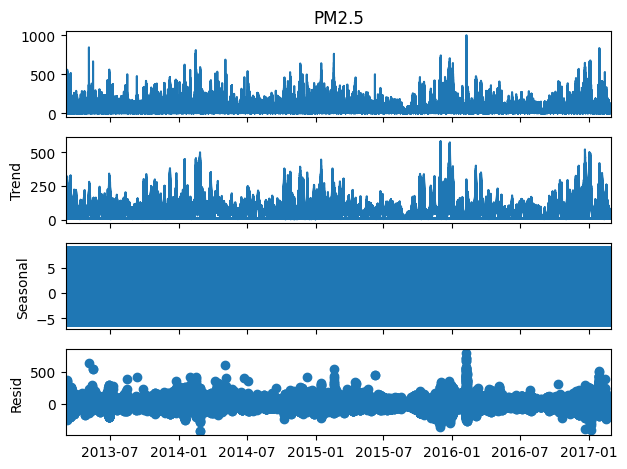

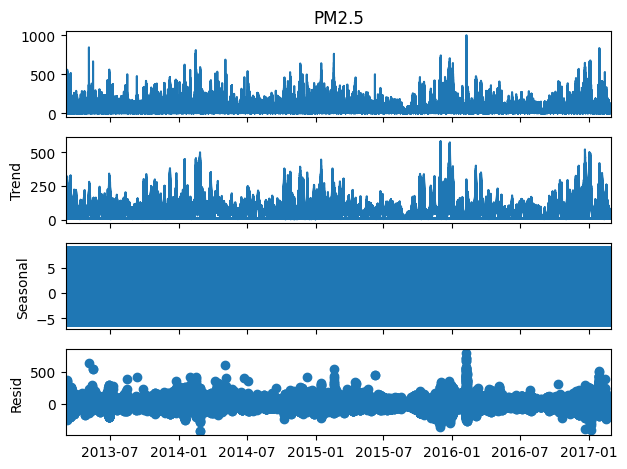

In [74]:
#seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['PM2.5'], model='additive', period=24)
result.plot()

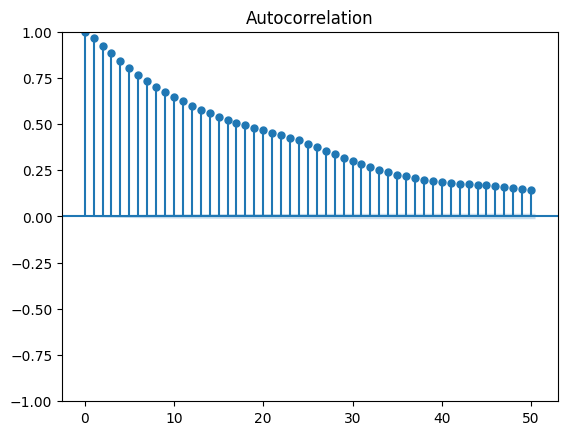

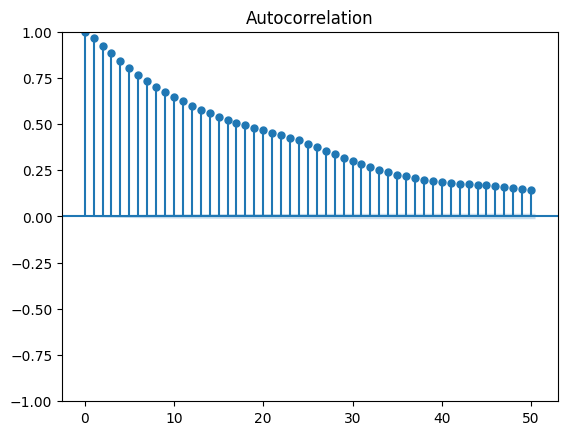

In [75]:
#auto correlation and partial auto correlation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['PM2.5'], lags=50)


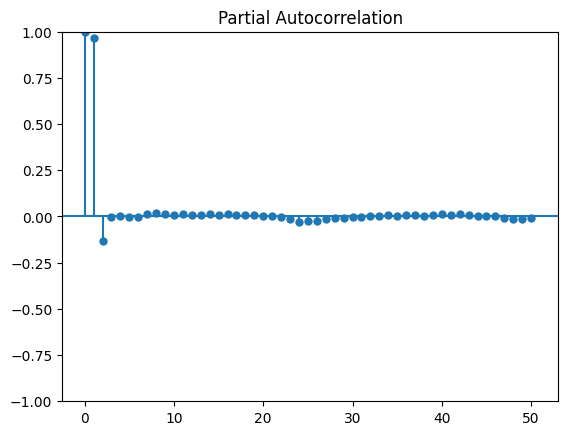

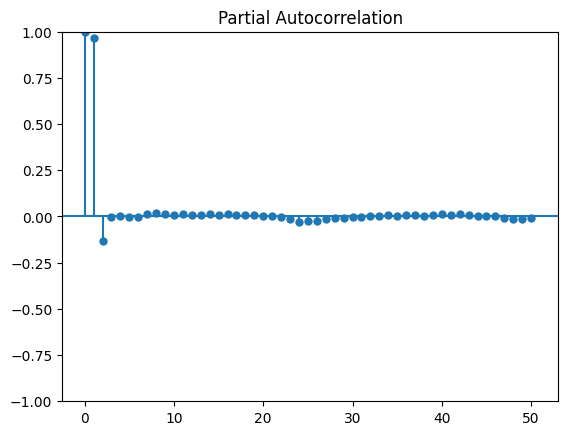

In [ ]:
plot_pacf(df['PM2.5'], lags=50)



In [77]:
df = df.sort_index()

# Define target variable
target = "PM2.5"

# Split data for training and testing
train = df.loc[:'2016-12-31']
test = df.loc['2017-01-01':]

X_train = train.drop(columns=[target])
y_train = train[target]

X_test = test.drop(columns=[target])
y_test = test[target]

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (403705, 75) (403705,)
Test: (16992, 75) (16992,)


In [ ]:
from statsmodels.tsa.stattools import adfuller

# training set
train_pm25 = df.loc[:'2016-12-31', 'PM2.5']

# downsample (daily average)
train_pm25 = train_pm25.resample('D').mean()

# Run ADF
result = adfuller(train_pm25.dropna(), maxlag=24, autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])



ADF Statistic: -10.700122237197686
p-value: 3.5409852479786785e-19


In [ ]:
# ARIMA Forecasting for PM2.5
# Split into train/test (80/20)
# train = df['PM2.5'][:int(0.8*len(df))]
# test = df['PM2.5'][int(0.8*len(df)):]

if len(train) > 100000:  
    train = train.resample('D').mean()  
    test = test.resample('D').mean()

# Fit ARIMA 
arima_model = ARIMA(train, order=(2,1,0)) 
arima_fit = arima_model.fit(low_memory=True, method_kwargs={'maxiter': 50})  
print(f'ARIMA Order ({2}, {1}, {0}) Fit Complete')

# Model summary
print(arima_fit.summary())

# Forecast
arima_forecast = arima_fit.forecast(len(test))

# Evaluate
mse = mean_squared_error(test, arima_forecast)
mae = mean_absolute_error(test, arima_forecast)
print(f'ARIMA MSE: {mse:.3f}')
print(f'ARIMA MAE: {mae:.3f}')

ARIMA Order (2, 1, 0) Fit Complete
                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                 1169
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -6434.911
Date:                Mon, 29 Sep 2025   AIC                          12875.821
Time:                        02:28:25   BIC                          12891.010
Sample:                    03-01-2013   HQIC                         12881.550
                         - 05-12-2016                                         
Covariance Type:               approx                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0796      0.028     -2.824      0.005      -0.135      -0.024
ar.L2         -0.2750      0.028     -9.752      0.000      -0.330      -0.220
sigma2      3574.

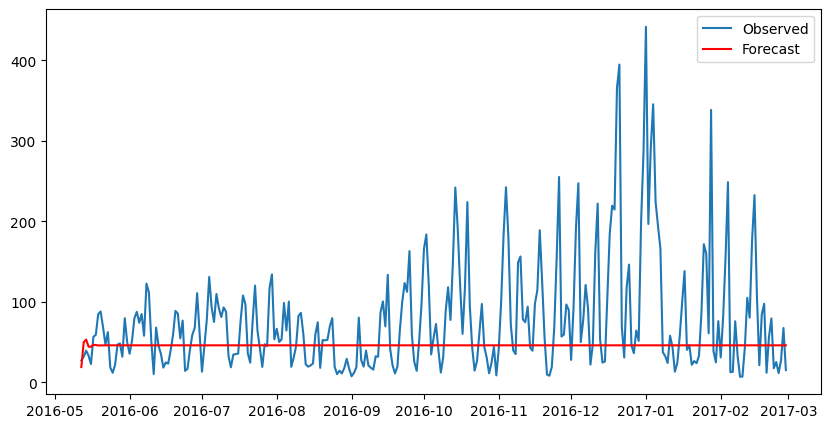

In [83]:
#plotting the arima forecast
plt.figure(figsize=(10,5))
plt.plot(test.index, test, label='Observed')
plt.plot(test.index, arima_forecast, label='Forecast', color='red')
plt.legend()
plt.show()

In [ ]:
# SARIMA Forecasting for PM2.5 
# Split into train/test 
# train = df['PM2.5'][:int(0.8*len(df))]
# test = df['PM2.5'][int(0.8*len(df)):]
if len(train) > 100000:  
    train = train.resample('D').mean()  
    test = test.resample('D').mean()
# Fit SARIMA with seasonal order 
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,24)) 
sarima_fit = sarima_model.fit(low_memory=True, method_kwargs={'maxiter': 50})  
print('SARIMA Fit Complete')
# Model summary
print(sarima_fit.summary())
# Forecast
sarima_forecast = sarima_fit.forecast(len(test))
# Evaluate
mse = mean_squared_error(test, sarima_forecast)
mae = mean_absolute_error(test, sarima_forecast)
print(f'SARIMA MSE: {mse:.3f}')
print(f'SARIMA MAE: {mae:.3f}')



c:\Users\nkulo\Desktop\ml\.venv\Lib\site-packages\statsmodels\base\optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: method_kwargs. After release 0.14, this will raise.
  warnings.warn(


SARIMA Fit Complete
                                     SARIMAX Results                                      
Dep. Variable:                              PM2.5   No. Observations:                 1169
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood               -6262.857
Date:                            Mon, 29 Sep 2025   AIC                          12535.714
Time:                                    02:36:08   BIC                          12560.926
Sample:                                03-01-2013   HQIC                         12545.234
                                     - 05-12-2016                                         
Covariance Type:                           approx                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5687      0.024     23.261      0.000       0.521       0.617
ma.L1         -

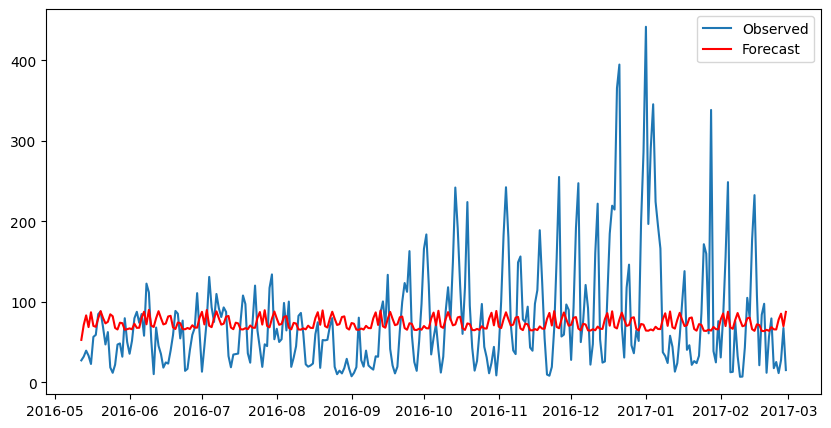

In [85]:
#plotting the sarima forecast
plt.figure(figsize=(10,5))
plt.plot(test.index, test, label='Observed')
plt.plot(test.index, sarima_forecast, label='Forecast', color='red')
plt.legend()
plt.show()

In [30]:

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare the data 
df_prophet = df[['PM2.5']].reset_index()  
df_prophet.columns = ['ds', 'y']         

# aggregate to daily to reduce memory
df_prophet = df_prophet.resample("D", on="ds").mean().reset_index()

# Drop missing values
df_prophet = df_prophet.dropna()

#Initialize and fit Prophet
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False 
)
model.fit(df_prophet)



01:34:56 - cmdstanpy - INFO - Chain [1] start processing
01:34:56 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
#Forecast 30 days ahead
future = model.make_future_dataframe(periods=30, freq="D")
forecast = model.predict(future)

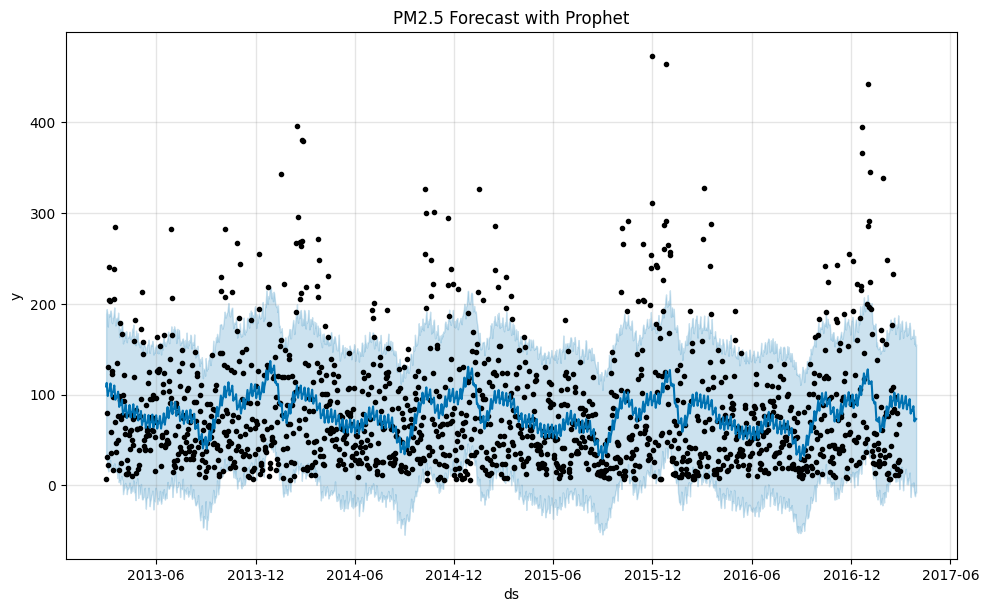

In [ ]:
#  forecast 
fig1 = model.plot(forecast)
plt.title("PM2.5 Forecast with Prophet")
plt.show()



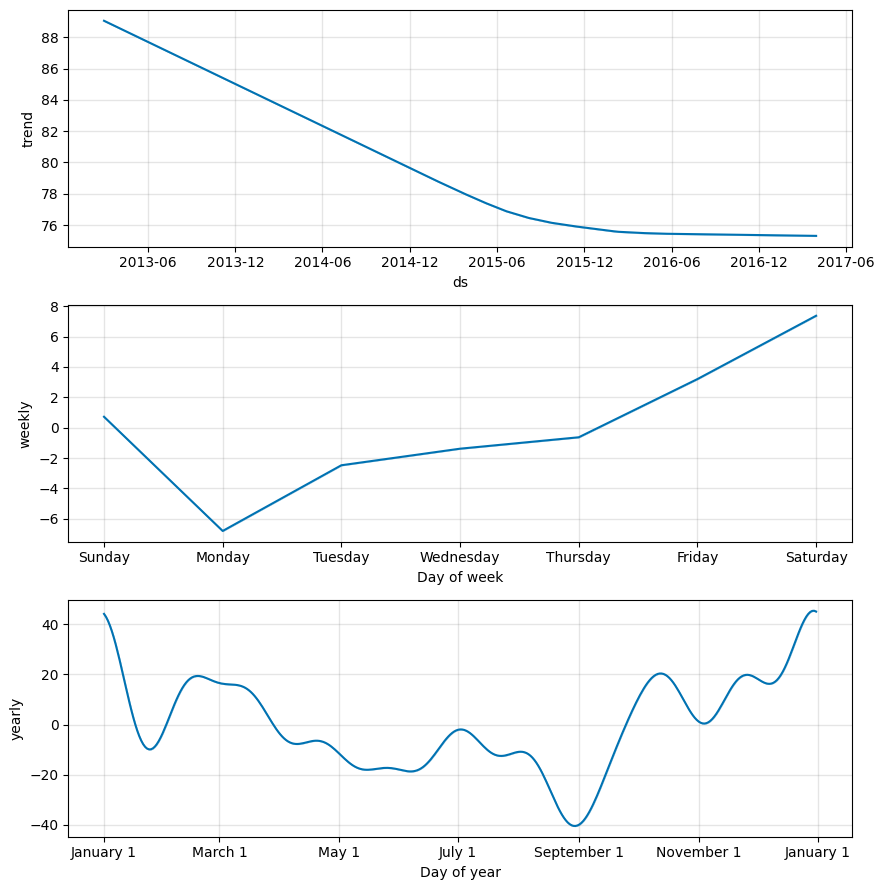

In [33]:
# Plot seasonality components
fig2 = model.plot_components(forecast)
plt.show()